<a href="https://colab.research.google.com/github/SiddharthDNathan/Electric-Power-Consumption---Time-Series-Analysis/blob/main/Individual_Household_Electric_Power_Consumption_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading and Cleaning

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSV Files/household_power_consumption.txt', sep=';')

<ipython-input-3-60c545664e58>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/CSV Files/household_power_consumption.txt', sep=';')


In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [6]:
df.shape

(2075259, 9)

In [7]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [9]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [10]:
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [11]:
round(df.isna().sum()/len(df)*100, 2)

,0
Date,0.00
Time,0.00
Global_active_power,0.00
Global_reactive_power,0.00
Voltage,0.00
Global_intensity,0.00
Sub_metering_1,0.00
Sub_metering_2,0.00
Sub_metering_3,1.25


In [12]:
duplicate_rows = df[df.duplicated()]

print("Duplicate rows across all columns:")
print(duplicate_rows)

Duplicate rows across all columns:
Empty DataFrame
Columns: [Date, Time, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3]
Index: []


After preliminary analysis of the data it looks like the dataset has mixed data types and some missing values in the Sub_metering_3 column. Let's proceed with the following steps:

1.Convert Date and Time columns to a datetime object.

2.Convert the remaining columns to numeric types, handling non-numeric values appropriately.

3.Handle missing values.

4.Set the datetime column as the index for time-series analysis.

## Step 1

In [13]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format = '%d/%m/%Y %H:%M:%S')

In [14]:
df = df.drop(columns = ['Date', 'Time'])

In [16]:
df.set_index('DateTime', inplace=True)

## Step 2

In [15]:
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


## Step 3

In [18]:
df.fillna(df.mean(), inplace=True)

In [19]:
df.isna().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


In [22]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [40]:
df['Calculated_active_power'] = (df['Global_active_power']/1000)
monthly_calculated_usage = df['Calculated_active_power'].resample('M').sum()
print(monthly_calculated_usage.head())

DateTime
2006-12-31    41.817648
2007-01-31    69.014045
2007-02-28    56.491069
2007-03-31    58.863284
2007-04-30    39.245549
Freq: M, Name: Calculated_active_power, dtype: float64


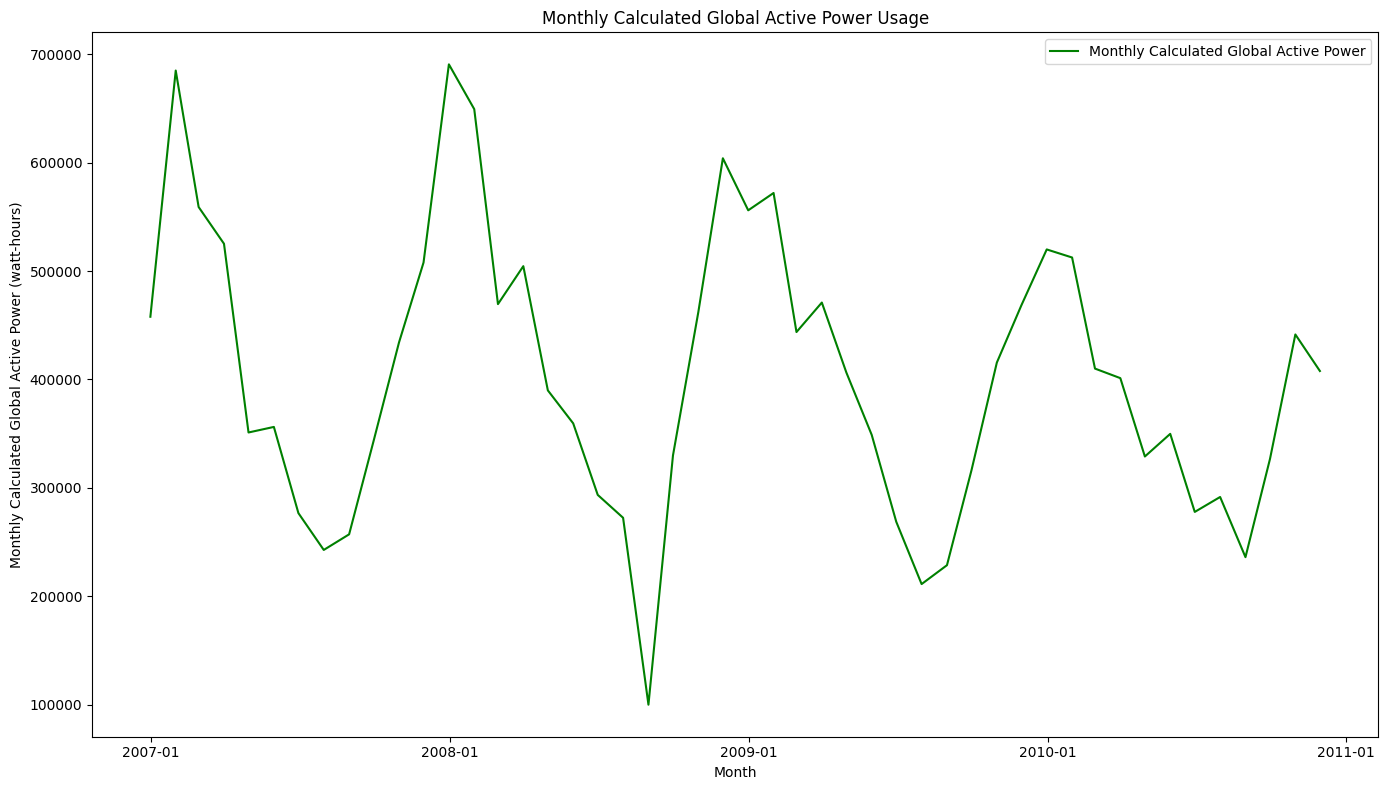

In [38]:
plt.figure(figsize=(14, 8))
plt.plot(monthly_calculated_usage.index, monthly_calculated_usage, label='Monthly Calculated Global Active Power', color='green')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Month')
plt.ylabel('Monthly Calculated Global Active Power (watt-hours)')
plt.title('Monthly Calculated Global Active Power Usage')
plt.legend()
plt.tight_layout()
plt.show()